In [1]:
from basket_util import *

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
import collections

import plotly as py
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go

from pySankey.sankey import sankey

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

from datetime import datetime, timedelta

import warnings
warnings.filterwarnings('ignore')

from plotly.offline import iplot, plot, init_notebook_mode, download_plotlyjs
init_notebook_mode(connected=True)


In [2]:
dropna = True
datecol = 'placed_at'
#filename = 'new_baskets_full.csv'
filename = 'new_baskets_adhie.csv'

baskets = prep_data(filename, dropna,datecol)
merchant_attributes = get_merchant_attributes(baskets)


In [3]:
merchant_topcat = pd.pivot_table(
    baskets,
    index='merchant_id',   # Column to turn into new index
    columns='top_cat_id',  # Column to turn into new columns
    values=['order_id', 'qty', 'spent'], # Column to aggregate for values
    aggfunc={'order_id': 'nunique', 'qty':sum, 'spent':sum},  # Aggregation function
    fill_value= 0,
)
merchant_topcat.columns = [f'{x}_{y}' for x,y in merchant_topcat.columns]


In [4]:
df0 = (merchant_attributes
    .query('tenure_month <=1'))
df1 = (merchant_attributes
    .query('tenure_month > 1 and last_month <= 19')
) # churner
df2 = (merchant_attributes
    .query('tenure_month > 1 and last_month > 19')
) # non-churner
churn_label = pd.concat([pd.DataFrame(zip(df0['merchant_id'], [1] * len(df0)), columns = ['merchant_id', 'churn']),
        pd.DataFrame(zip(df1['merchant_id'], [1] * len(df1)), columns = ['merchant_id', 'churn']),
        pd.DataFrame(zip(df2['merchant_id'], [0] * len(df2)), columns = ['merchant_id', 'churn'])], axis=0)
churn_label = churn_label.set_index(keys='merchant_id')
#df0.merchant_id.nunique() , df1.merchant_id.nunique(), df2.merchant_id.nunique(), df0.merchant_id.nunique() + df1.merchant_id.nunique()+ df2.merchant_id.nunique()

In [5]:
merchant_attributes = merchant_attributes.set_index(keys='merchant_id')
merchant_attributes = pd.merge(merchant_attributes, merchant_topcat, on="merchant_id")
df_churn = pd.merge(churn_label, merchant_attributes, on = "merchant_id")

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(merchant_attributes, churn_label)
#cross_val_score(clf, merchant_attributes, churn_label, cv=10)

[Text(0.7008928571428571, 0.9666666666666667, 'X[2] <= 9.5\ngini = 0.447\nsamples = 329\nvalue = [218, 111]'),
 Text(0.6651785714285714, 0.9, 'gini = 0.0\nsamples = 59\nvalue = [0, 59]'),
 Text(0.7366071428571429, 0.9, 'X[2] <= 10.5\ngini = 0.311\nsamples = 270\nvalue = [218, 52]'),
 Text(0.5803571428571429, 0.8333333333333334, 'X[7] <= 361.5\ngini = 0.429\nsamples = 141\nvalue = [97, 44]'),
 Text(0.44642857142857145, 0.7666666666666667, 'X[115] <= 399500.0\ngini = 0.377\nsamples = 115\nvalue = [86, 29]'),
 Text(0.35714285714285715, 0.7, 'X[68] <= 11.0\ngini = 0.462\nsamples = 58\nvalue = [37, 21]'),
 Text(0.32142857142857145, 0.6333333333333333, 'X[74] <= 2.5\ngini = 0.422\nsamples = 53\nvalue = [37, 16]'),
 Text(0.2857142857142857, 0.5666666666666667, 'X[58] <= 96.0\ngini = 0.385\nsamples = 50\nvalue = [37, 13]'),
 Text(0.25, 0.5, 'X[101] <= 574500.0\ngini = 0.353\nsamples = 48\nvalue = [37, 11]'),
 Text(0.21428571428571427, 0.43333333333333335, 'X[96] <= 269750.0\ngini = 0.315\nsamp

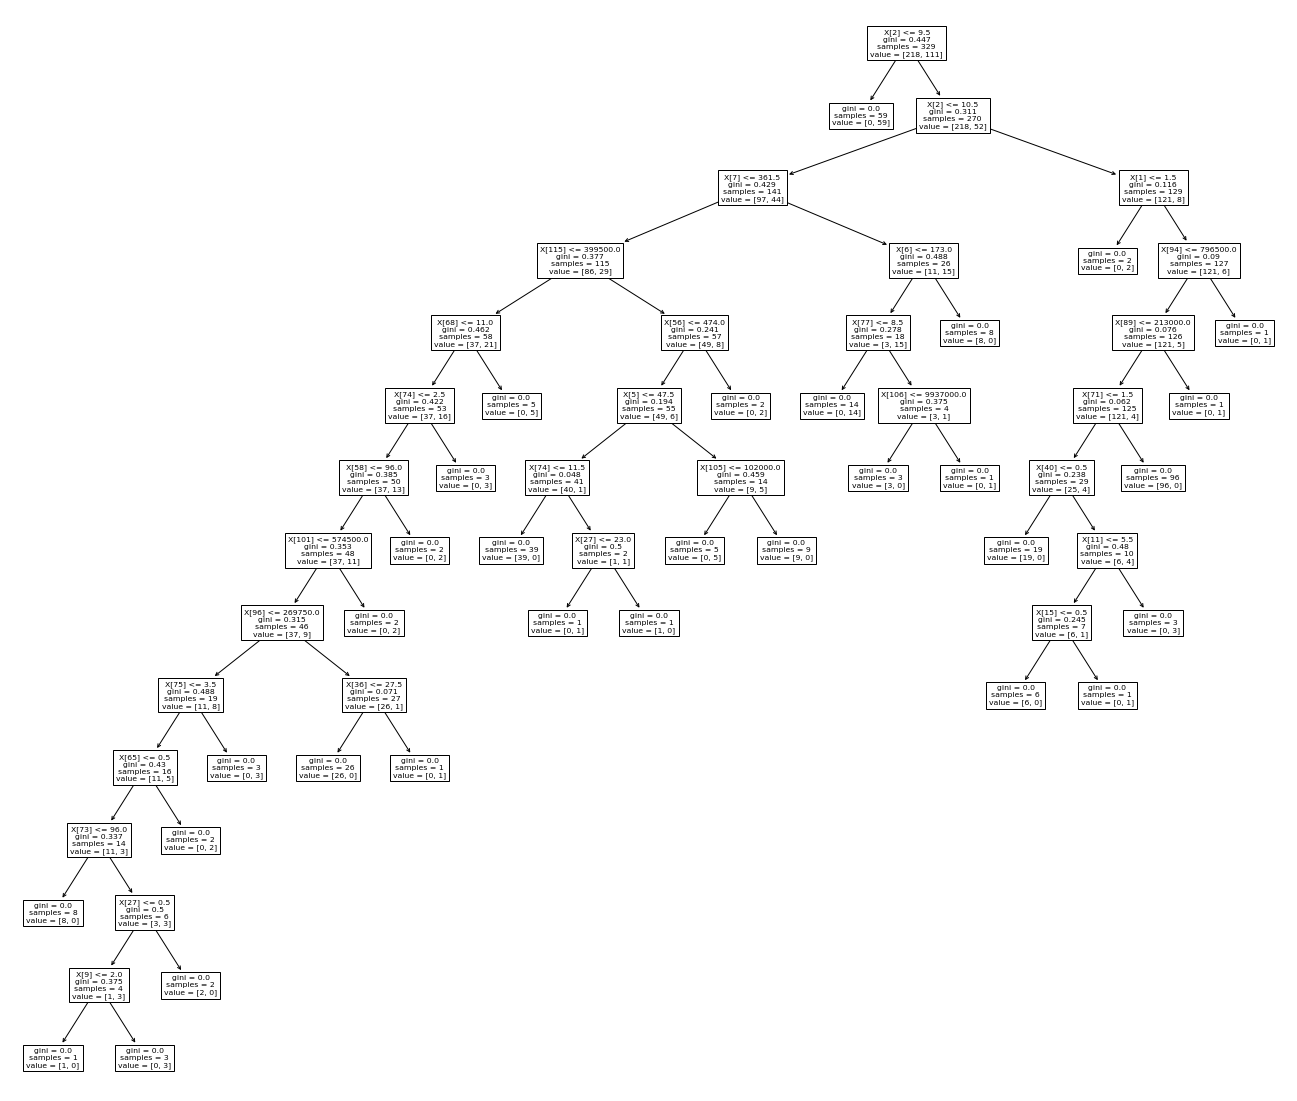

In [13]:
plt.figure(figsize=(23, 20))  
tree.plot_tree(clf)


### now df_churn is ready to be used for training a supervised learning model

In [15]:
for s in merchant_attributes.columns:
    print(s)

total_spent
num_orders
first_month
last_month
num_months
num_weeks
num_days
num_skus
num_top_cats
num_sub_cats
avg_spent_per_order
tenure_month
order_id_1
order_id_2
order_id_3
order_id_4
order_id_5
order_id_6
order_id_7
order_id_8
order_id_9
order_id_10
order_id_11
order_id_12
order_id_13
order_id_14
order_id_15
order_id_16
order_id_17
order_id_18
order_id_19
order_id_20
order_id_21
order_id_22
order_id_23
order_id_24
order_id_25
order_id_26
order_id_27
order_id_28
order_id_29
order_id_30
order_id_31
order_id_32
order_id_33
order_id_34
order_id_35
qty_1
qty_2
qty_3
qty_4
qty_5
qty_6
qty_7
qty_8
qty_9
qty_10
qty_11
qty_12
qty_13
qty_14
qty_15
qty_16
qty_17
qty_18
qty_19
qty_20
qty_21
qty_22
qty_23
qty_24
qty_25
qty_26
qty_27
qty_28
qty_29
qty_30
qty_31
qty_32
qty_33
qty_34
qty_35
spent_1
spent_2
spent_3
spent_4
spent_5
spent_6
spent_7
spent_8
spent_9
spent_10
spent_11
spent_12
spent_13
spent_14
spent_15
spent_16
spent_17
spent_18
spent_19
spent_20
spent_21
spent_22
spent_23
spent_24
sp

In [ ]:
np.random.seed(0)
merchant_attributes.reset_index(drop=True)
churn_label.reset_index(drop=True)
indices = np.random.permutation(len(merchant_attributes))
df_churn_x_train = merchant_attributes[indices[:-10]]
df_churn_y_train = churn_label[indices[:-10]]
df_churn_x_test = merchant_attributes[indices[-10:]]
df_churn_y_test = churn_label[indices[-10:]]
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(df_churn_x_train, df_churn_y_train)
KNeighborsClassifier()


In [ ]:
knn.predict(df_churn_x_test)
df_churn_y_test

In [3]:
df = (merchant_attributes
    #.query('last_month < 20')
    .groupby(['first_month','last_month'])
    ['merchant_id']
    .agg('nunique')
    .reset_index()
)
df[df['first_month']==df['last_month']].merchant_id.sum()

24

In [4]:
(merchant_attributes
    .query('first_month == last_month and last_month < 16')
    ['merchant_id']
    .nunique()) #/ merchant_attributes.shape[0]

11

In [13]:
sku_attributes = get_sku_attributes(baskets)
order_attributes = get_order_attributes(baskets)

sku_by_day = get_skus_by_day(baskets)
top_cats = make_top_cats(baskets)

,churn,total_spent,num_orders,first_month,last_month,num_months,num_weeks,num_days,num_skus,num_top_cats,num_sub_cats,avg_spent_per_order,tenure_month
merchant_id,,,,,,,,,,,,,
6,1,1195500.0,2,10,10,1,2,2,19,7,9,5.977500e+05,1
7,1,18300.0,1,11,11,1,1,1,1,1,1,1.830000e+04,1
8,1,96000.0,1,11,11,1,1,1,1,1,1,9.600000e+04,1
34,1,2756500.0,2,10,10,1,1,2,15,4,5,1.378250e+06,1
138,1,16931500.0,2,10,10,1,1,2,26,11,11,8.465750e+06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,0,11531000.0,9,20,21,2,5,9,50,13,17,1.281222e+06,2
317,0,83309500.0,22,20,21,2,7,21,138,18,31,3.786795e+06,2
318,0,96731900.0,39,20,21,2,6,36,197,24,54,2.480305e+06,2


In [20]:
df_churn

,churn,total_spent,num_orders,first_month,last_month,num_months,num_weeks,num_days,num_skus,num_top_cats,...,spent_26,spent_27,spent_28,spent_29,spent_30,spent_31,spent_32,spent_33,spent_34,spent_35
merchant_id,,,,,,,,,,,,,,,,,,,,,
6,1,1195500.0,2,10,10,1,2,2,19,7,...,0,785000,0,94000,0,0,0.0,0,0,0
7,1,18300.0,1,11,11,1,1,1,1,1,...,0,18300,0,0,0,0,0.0,0,0,0
8,1,96000.0,1,11,11,1,1,1,1,1,...,0,0,0,0,0,0,0.0,0,0,0
34,1,2756500.0,2,10,10,1,1,2,15,4,...,0,2263500,0,0,0,0,0.0,0,0,0
138,1,16931500.0,2,10,10,1,1,2,26,11,...,0,13980500,0,97000,0,0,0.0,0,1181000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,0,11531000.0,9,20,21,2,5,9,50,13,...,0,0,0,913500,74000,0,445000.0,0,745000,0
317,0,83309500.0,22,20,21,2,7,21,138,18,...,401000,51693000,495000,757000,0,0,175000.0,0,2017000,50000
318,0,96731900.0,39,20,21,2,6,36,197,24,...,446000,70592600,39000,763000,0,0,277000.0,0,752500,50000


In [7]:
df1 = (merchant_attributes
    .query('tenure_month > 2')
    .query('last_month == 16')
) # churner
df2 = (merchant_attributes
    .query('tenure_month > 5')
    .query('last_month > 16')
) # non-churner
df1.merchant_id.nunique(), df2.merchant_id.nunique()

(11, 213)

In [ ]:
df = (merchants.query('last_month > 16' and 'tenure_month > 5')
    .groupby('tenure_month')
    ['merchant_id']
    .agg('nunique') # aggregate using custom function
    .reset_index()
    #.query('month_num < 18')
)
df.merchant_id.sum()

In [ ]:
df = (baskets #.query('month_num < 18')
    .groupby('merchant_id')
    ['month_num']
    .agg(max) # aggregate using custom function
    .reset_index()
    .query('month_num < 18')
)
df.shape

In [90]:
baskets = baskets[baskets.merchant_id !=190]
baskets = baskets[baskets.merchant_id !=12]
baskets = baskets[baskets.merchant_id !=206]
baskets = baskets[baskets.date >=  pd.to_datetime('2021-09-27').date()]

df1 = pd.pivot_table(
    baskets,
    index='merchant_id',   # Column to turn into new index
    columns='top_cat_id',  # Column to turn into new columns
    values='order_id', # Column to aggregate for values
    aggfunc="nunique")    # Aggregation function
df2 = pd.pivot_table(
    baskets,
    index='merchant_id',   # Column to turn into new index
    columns='top_cat_id',  # Column to turn into new columns
    values='spent', # Column to aggregate for values
    aggfunc="sum")    # Aggregation function
df1.fillna(0,inplace=True)
df2.fillna(0,inplace=True)

In [91]:
df1.head()

top_cat_id,1,2,3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,33,34,35
merchant_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,1.0,8.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,2.0,7.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,11.0,0.0,0.0,1.0,1.0,9.0,...,3.0,29.0,0.0,3.0,0.0,1.0,1.0,1.0,4.0,6.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import normalize
data_scaled = normalize(df1)
data_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.07955573,
        0.        ],
       [0.09166985, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.02490677, ..., 0.02490677, 0.0996271 ,
        0.14944064],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.10050378,
        0.10050378],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

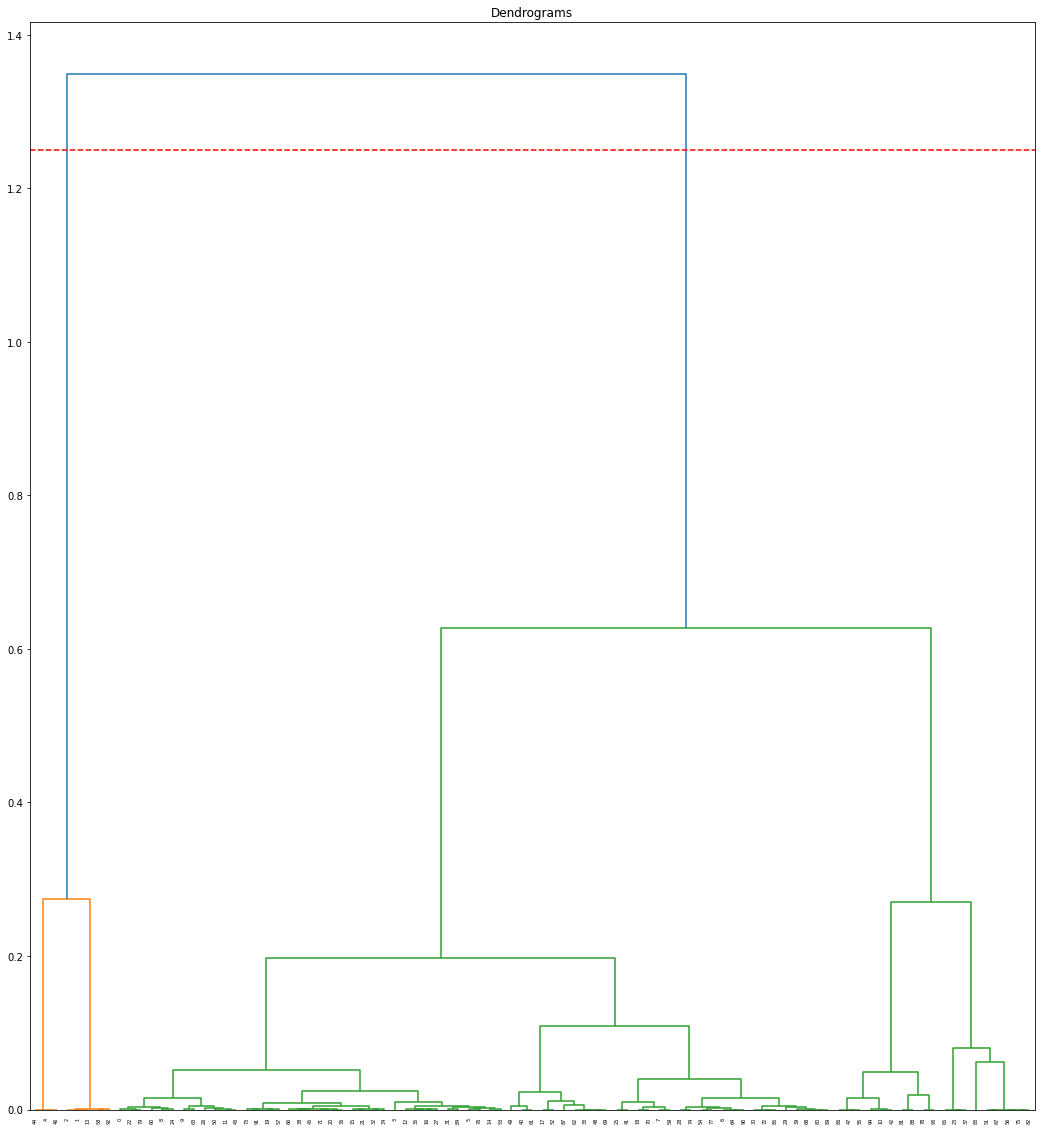

In [88]:
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import normalize
data_scaled = normalize(df1)
data_scaled = pd.DataFrame(data_scaled, columns=df1.columns)
#data_scaled.head()

plt.figure(figsize=(18, 20))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=1.25, color='r', linestyle='--')


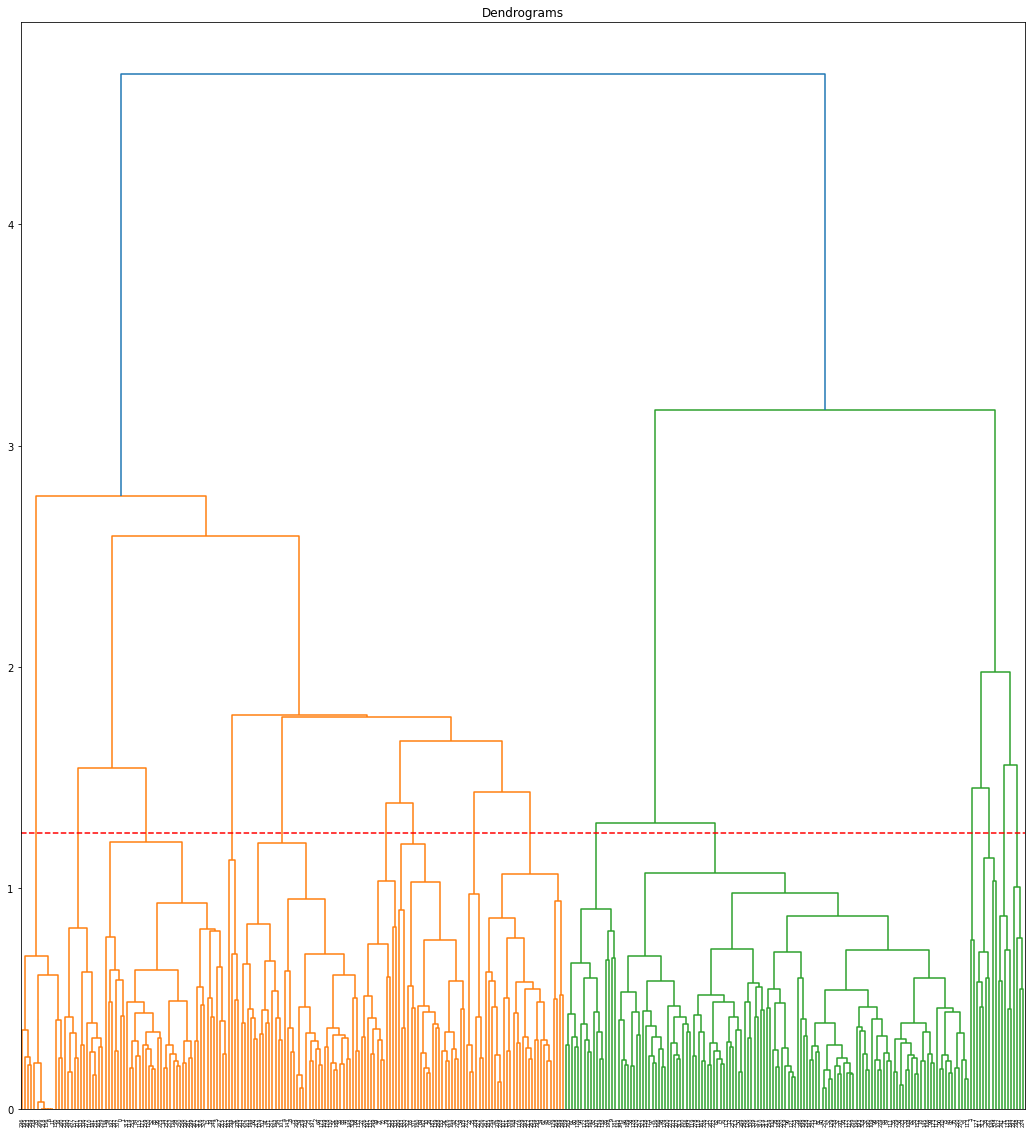

In [74]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(18, 20))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=1.25, color='r', linestyle='--')


In [89]:
data_scaled.head()

,merchant_id,total_spent,num_orders,first_month,last_month,num_months,num_weeks,num_days,num_skus,num_top_cats,num_sub_cats,avg_spent_per_order,tenure_month
0,7.880304e-08,0.999635,9.719042e-07,2.889445e-07,4.202829e-07,1.576061e-07,3.414798e-07,6.829597e-07,3.808814e-06,6.304243e-07,1.129510e-06,0.027017,1.576061e-07
1,1.663741e-06,0.894427,6.654964e-07,4.325727e-06,5.989468e-06,6.654964e-07,6.654964e-07,6.654964e-07,6.654964e-06,2.329237e-06,2.994734e-06,0.447214,1.996489e-06
2,4.595998e-06,0.894427,9.191996e-07,2.757599e-06,4.595998e-06,9.191996e-07,9.191996e-07,9.191996e-07,1.746479e-05,5.515198e-06,9.191996e-06,0.447214,2.297999e-06
3,3.095840e-09,1.000000,9.107397e-07,1.688640e-09,5.628799e-09,1.970080e-09,5.910239e-09,3.292848e-08,1.865947e-07,9.287519e-09,2.279664e-08,0.000309,4.221599e-09
4,1.860584e-06,0.948683,4.293656e-07,8.587312e-07,1.431219e-06,2.862437e-07,2.862437e-07,2.862437e-07,1.288097e-06,1.431219e-07,1.431219e-07,0.316228,7.156093e-07


 - big cluster (131 members) was only able to be broken down at n-cluster = 15
 - cluster number = 5 or 8 are the best at breaking down big clusters.

In [95]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')  
df1_results['label'] = pd.DataFrame(cluster.fit_predict(data_scaled))
df1_results.groupby('label').count()

,0
label,
0,66
1,9
2,9
3,39
4,53
5,131
6,4
7,14


,0
label,
0,109
1,9
2,9
3,14
4,53
5,131
